<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Ago18-19/Tarea_Ago18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problema
Reiss et al. (A-3) compararon ensayos de laboratorio hospitalarios estándar y en el punto de atención para monitorear pacientes que recibieron un solo anticoagulante o un régimen que consiste en una combinación de anticoagulantes. Cuando se comparan dos técnicas de medición, es bastante común usar análisis de regresión en los que una variable se usa para predecir otra.

En el presente estudio, los investigadores obtuvieron medidas de la razón normalizada internacional (INR) mediante análisis de muestras de sangre venosa y capilar recolectadas de 90 sujetos que tomaban warfarina. El INR, utilizado especialmente cuando los pacientes reciben warfarina, mide la capacidad de coagulación de la sangre. Las pruebas de INR en el punto de atención se realizaron con el producto de ensayo CoaguChek. Las pruebas hospitalarias se realizaron con ensayos estándar de laboratorio hospitalario. Los autores utilizaron el nivel de INR del ensayo del hospital para predecir el nivel de INR de CoaguChek. Las medidas se dan en la siguiente tabla.

In [4]:
data=np.loadtxt("/content/drive/MyDrive/Colab Notebooks/EXR.txt",delimiter = ',').T
data

array([[1.8, 1.6, 2.5, 1.9, 1.3, 2.3, 1.2, 2.3, 2. , 1.5, 2.1, 1.5, 1.5,
        1.8, 1. , 2.1, 1.6, 1.7, 2. , 1.8, 1.3, 1.5, 3.6, 2.4, 2.2, 2.7,
        2.9, 2. , 1. , 2.4, 2.4, 2.3, 2. , 3.3, 1.9, 1.8, 2.8, 2.5, 0.8,
        1.3, 3.7, 2.4, 4.1, 2.4, 2.3, 3.1, 1.5, 3.6, 2.5, 2.1, 1.8, 1.5,
        2.5, 1.5, 1.5, 1.6, 1.4, 4. , 2. , 2.5, 3.1, 1.7, 1.8, 1.9, 5.3,
        1.6, 1.6, 3.3, 1.5, 2.2, 1.1, 2.6, 6.4, 1.5, 3. , 2.6, 1.2, 2.1,
        1.1, 1. , 1.4, 1.7, 1.2, 2.5, 1.2, 2.5, 1.9, 1.8, 1.2, 1.3],
       [1.6, 1.9, 2.8, 2.4, 1.5, 1.8, 1.3, 2.4, 2.1, 1.5, 2.4, 1.5, 1.7,
        2.1, 1.2, 1.9, 1.6, 1.6, 1.9, 1.6, 4.1, 1.9, 2.1, 2.2, 2.3, 2.2,
        3.1, 2.2, 1.2, 2.6, 1.2, 2.3, 1.6, 3.8, 1.6, 1.5, 1.8, 1.5, 1. ,
        1.2, 1.4, 1.6, 3.2, 1.2, 2.3, 1.6, 1.4, 2.1, 1.7, 1.7, 1.2, 1.3,
        1.1, 1.2, 1.1, 1.2, 1.4, 2.3, 1.2, 1.5, 2.4, 1.8, 1.6, 1.7, 4.2,
        1.6, 1.4, 3.3, 1.5, 2.8, 1.6, 2.6, 5. , 1.4, 2.8, 2.3, 1.2, 1.9,
        1.1, 1. , 1.5, 1.3, 1.1, 2.4, 1.3, 2.9, 1.7, 1.

In [5]:
x=data[0]
y=data[1]

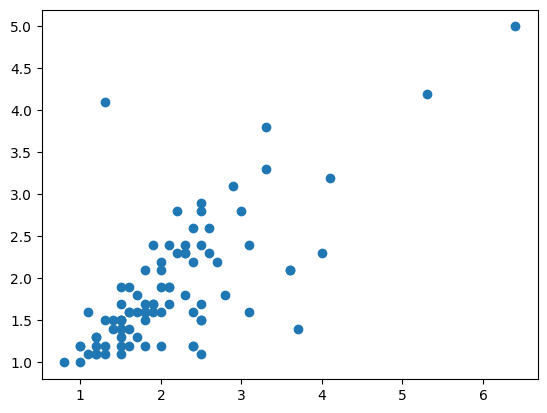

In [13]:
plt.scatter(x,y)

# Metodo de minimos cuadrados

## Ecuaciones

$$m=\frac{\sum x_i y_i-\sum x_i\sum y_i/N } {\sum x_i^2-(\sum x_i)^2/N} $$

$$b=\frac{\sum y_i -m\sum x_i}{N}$$


In [7]:
#definimos las ecuaciones
def m_(x,y):
  n=len(x)
  m=(np.add.reduce(x*y)-(np.add.reduce(x)*np.add.reduce(y))/n)/(np.add.reduce(x**2)-(np.add.reduce(x))**2/n)
  return m
def b_(x,y):
  n=len(x)
  b=(np.add.reduce(y)-m_(x,y)*np.add.reduce(x))/(n)
  return b

In [8]:
# Valores
m=m_(x,y)
b=b_(x,y)

print(m)
print(b)

0.5938755903167752
0.6269225044316041


In [9]:
# Dominio
x1=np.linspace(np.min(x),np.max(x),100)
f = lambda x :  m*x + b

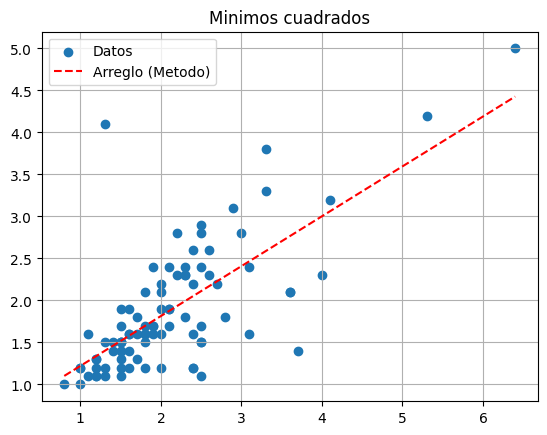

In [10]:
#Grafico
plt.scatter(x,y,label='Datos')
plt.plot(x1,f(x1),'--r',label='Arreglo (Metodo)')
plt.grid()
plt.title('Minimos cuadrados')
plt.legend()